In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import random
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
import seaborn as sns
from scipy import stats

#  **Preprocessing Data**

In [ ]:
# Membaca dataset Salju dan memasukannya kedalam data frame

df = pd.read_csv('salju_train (1).csv')

In [ ]:
# Mengkonfigurasi, hanya ditampilkan beberapa dataset saja 

pd.set_option('display.max_rows', 20)

In [ ]:
df

,id,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,1,01/06/2014,C4,10.4,15.5,4.8,NaN,NaN,WSW,24.0,NaN,WSW,0.0,13.0,78.0,76.0,1020.1,1018.5,NaN,NaN,13.1,15.0,Ya,Tidak
1,2,15/07/2014,C10,9.0,17.0,8.0,2.6,7.4,NaN,NaN,SW,WNW,13.0,20.0,80.0,61.0,1015.2,1014.6,7.0,5.0,11.9,15.5,Ya,Ya
2,3,16/02/2011,C46,18.2,32.0,0.0,NaN,NaN,ESE,44.0,SE,SE,15.0,26.0,62.0,42.0,NaN,NaN,NaN,NaN,23.8,29.6,Tidak,Tidak
3,4,08/08/2012,C36,7.3,24.5,0.0,8.4,10.4,SSW,54.0,N,SW,13.0,19.0,25.0,17.0,1019.2,1016.9,1.0,7.0,15.3,23.2,Tidak,Tidak
4,5,29/10/2016,C7,5.9,20.3,0.0,3.6,12.6,N,37.0,NNW,ESE,22.0,19.0,55.0,48.0,1019.7,1014.7,2.0,6.0,12.4,18.1,Tidak,Tidak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109090,109091,31/01/2009,C38,20.1,23.7,0.0,7.2,8.9,ESE,43.0,SE,ESE,24.0,26.0,74.0,70.0,1019.3,1017.6,4.0,6.0,22.0,22.1,Tidak,Ya
109091,109092,03/11/2010,C16,15.7,25.2,0.0,NaN,NaN,SSE,37.0,SSE,E,28.0,19.0,52.0,52.0,1018.4,1016.2,NaN,NaN,23.8,24.4,Tidak,Ya
109092,109093,11/11/2010,C17,7.5,20.4,1.6,NaN,NaN,NW,33.0,N,NW,4.0,13.0,92.0,51.0,1014.5,1010.6,NaN,NaN,12.6,19.8,Ya,Tidak
109093,109094,16/04/2012,C11,10.8,29.8,0.0,7.8,11.2,E,48.0,ESE,SE,13.0,26.0,35.0,18.0,1020.0,1015.8,0.0,1.0,21.7,29.2,Tidak,Tidak


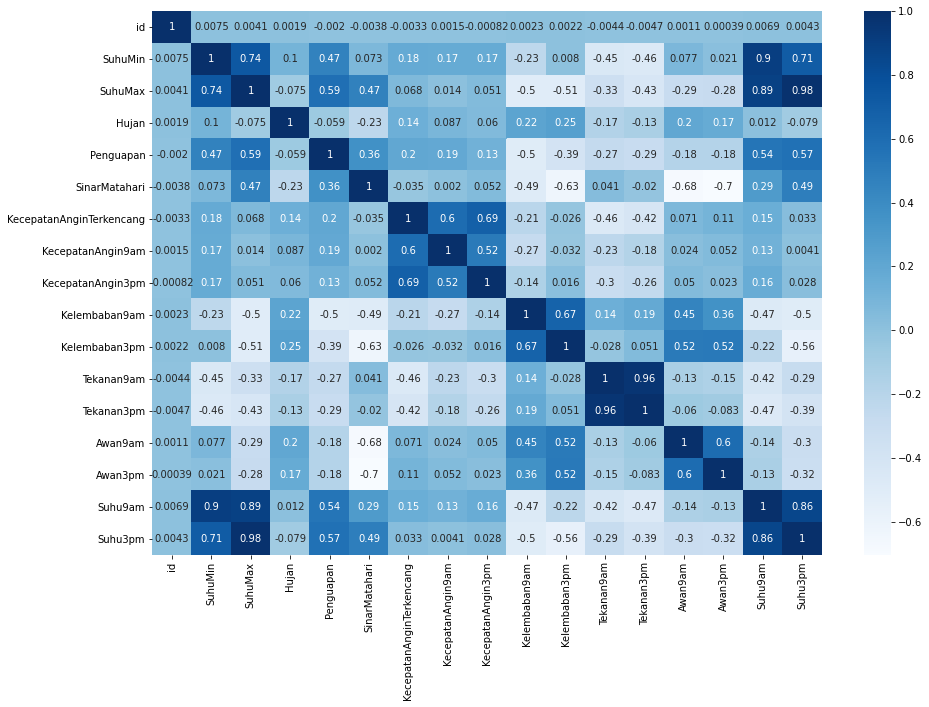

In [ ]:
# Menampilkan korelasi antar atribut


plt.figure(figsize=(15,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

In [ ]:
# Melakukan copy dataframe, hanya untuk beberapa atribut yang akan digunakan

prepared_data = df.loc[:,['Penguapan','SuhuMin','SuhuMax']]
pd.set_option('display.max_rows', 20)
prepared_data

,Penguapan,SuhuMin,SuhuMax
0,NaN,10.4,15.5
1,2.6,9.0,17.0
2,NaN,18.2,32.0
3,8.4,7.3,24.5
4,3.6,5.9,20.3
...,...,...,...
109090,7.2,20.1,23.7
109091,NaN,15.7,25.2
109092,NaN,7.5,20.4
109093,7.8,10.8,29.8


In [ ]:
# Menghilangkan missing data dan data yang redundant

prepared_data = prepared_data.dropna()
prepared_data = prepared_data.drop_duplicates(keep='first')

In [ ]:
prepared_data

,Penguapan,SuhuMin,SuhuMax
1,2.6,9.0,17.0
3,8.4,7.3,24.5
4,3.6,5.9,20.3
5,3.2,14.4,21.8
6,5.6,7.7,18.7
...,...,...,...
109081,6.0,15.6,32.6
109084,34.6,15.5,19.8
109088,8.0,14.3,26.2
109090,7.2,20.1,23.7


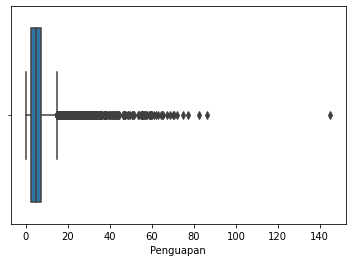

In [ ]:
sns.boxplot(x=prepared_data['Penguapan'])

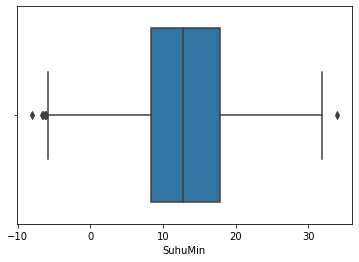

In [ ]:
sns.boxplot(x=prepared_data['SuhuMin'])

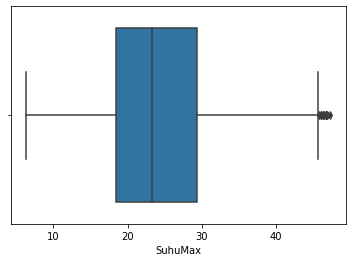

In [ ]:
sns.boxplot(x=prepared_data['SuhuMax'])

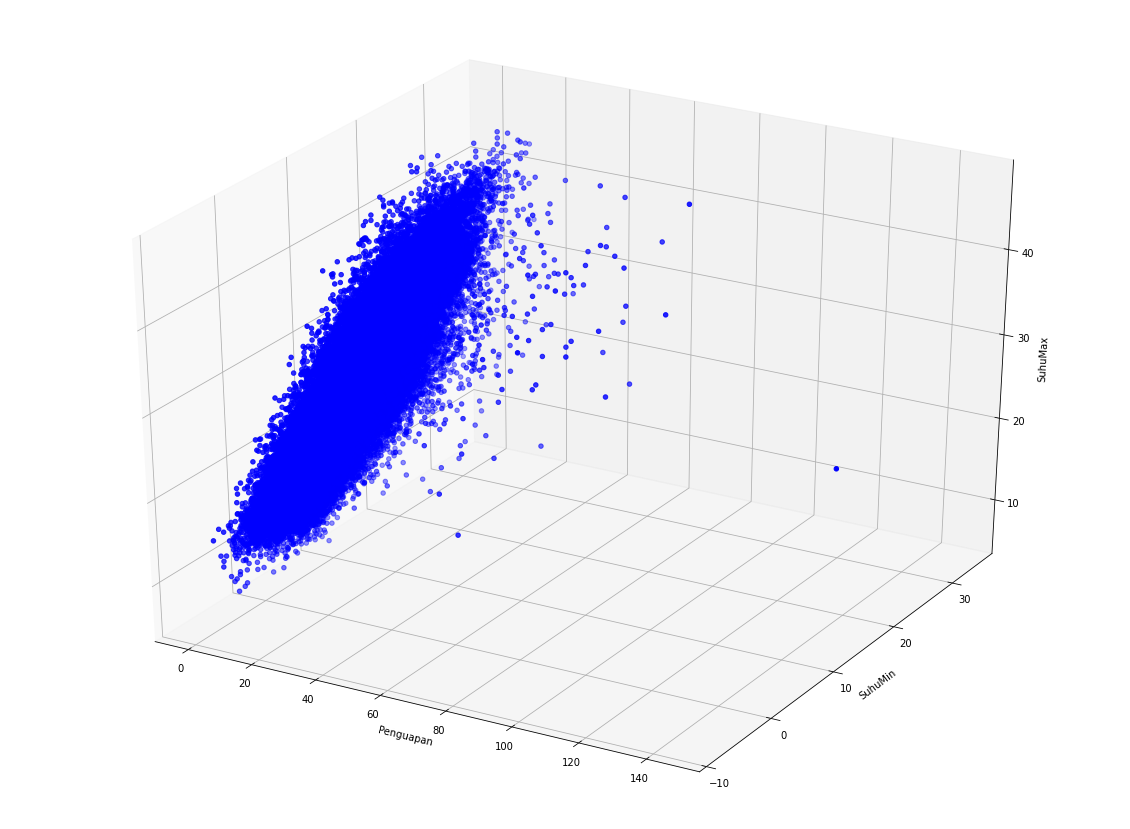

In [ ]:
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(prepared_data['Penguapan'], prepared_data['SuhuMin'],prepared_data['SuhuMax'], c='b', marker='o')

ax.set_xlabel('Penguapan')
ax.set_ylabel('SuhuMin')
ax.set_zlabel('SuhuMax')

plt.show()

In [ ]:
# Menghilangkan data pencilan
Q1 = prepared_data['Penguapan'].quantile(0.25)
Q3 = prepared_data['Penguapan'].quantile(0.75)
IQR = Q3 - Q1    

filter = (prepared_data['Penguapan'] >= Q1 - 1.5 * IQR) & (prepared_data['Penguapan'] <= Q3 + 1.5 *IQR)
prepared_data = prepared_data.loc[filter] 

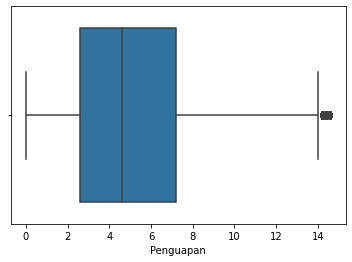

In [ ]:
sns.boxplot(x=prepared_data['Penguapan'])

In [ ]:
# Menghilangkan data pencilan
Q1 = prepared_data['SuhuMin'].quantile(0.25)
Q3 = prepared_data['SuhuMin'].quantile(0.75)
IQR = Q3 - Q1    

filter = (prepared_data['SuhuMin'] >= Q1 - 1.5 * IQR) & (prepared_data['SuhuMin'] <= Q3 + 1.5 *IQR)
prepared_data = prepared_data.loc[filter] 

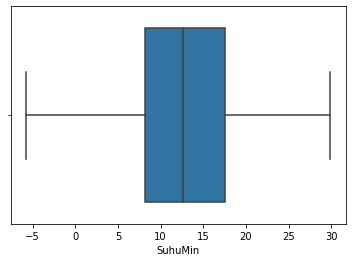

In [ ]:
sns.boxplot(x=prepared_data['SuhuMin'])

In [ ]:
# Menghilangkan data pencilan
Q1 = prepared_data['SuhuMax'].quantile(0.25)
Q3 = prepared_data['SuhuMax'].quantile(0.75)
IQR = Q3 - Q1    

filter = (prepared_data['SuhuMax'] >= Q1 - 1.5 * IQR) & (prepared_data['SuhuMax'] <= Q3 + 1.5 *IQR)
prepared_data = prepared_data.loc[filter] 

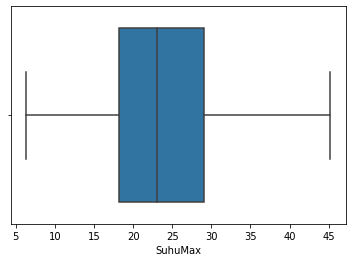

In [ ]:
sns.boxplot(x=prepared_data['SuhuMax'])

In [ ]:
prepared_data = prepared_data.reset_index(drop=True)

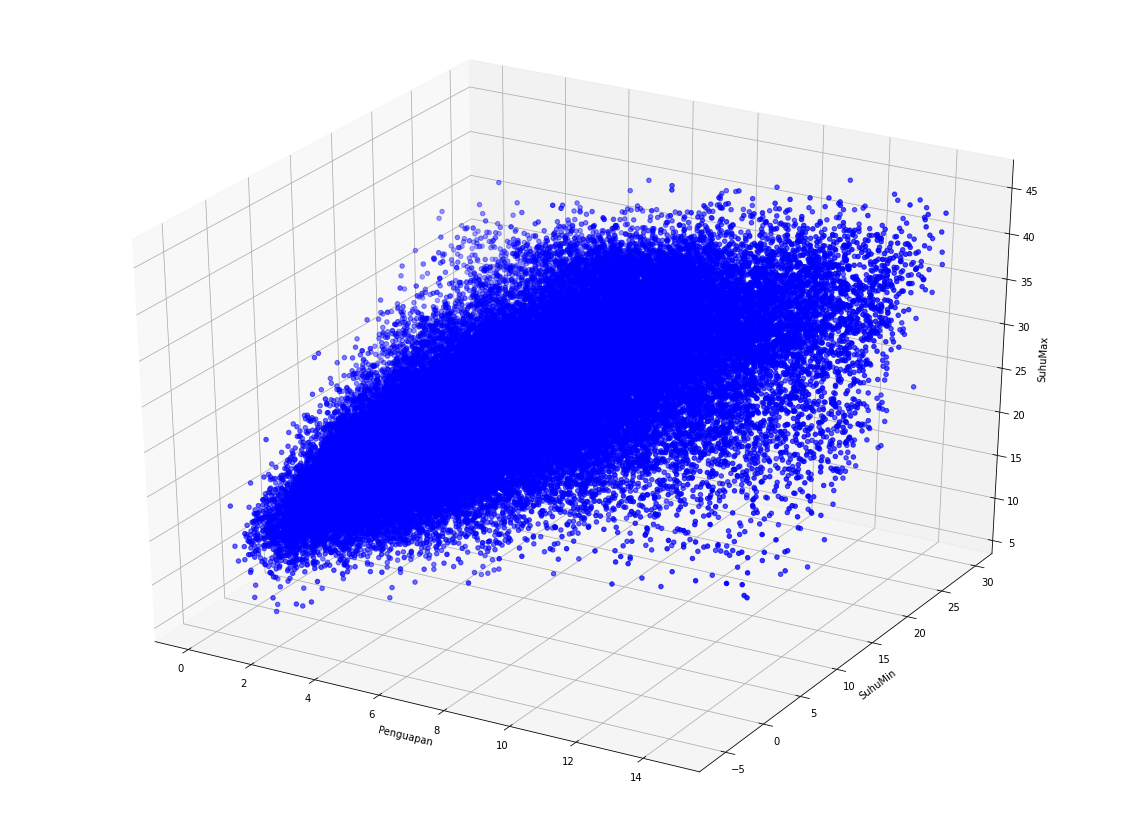

In [ ]:
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(prepared_data['Penguapan'], prepared_data['SuhuMin'],prepared_data['SuhuMax'], c='b', marker='o')

ax.set_xlabel('Penguapan')
ax.set_ylabel('SuhuMin')
ax.set_zlabel('SuhuMax')

plt.show()

#  **Normalisasi**




In [ ]:
data_before_norm = prepared_data.loc[:,['Penguapan','SuhuMin','SuhuMax']]
data_before_norm

,Penguapan,SuhuMin,SuhuMax
0,2.6,9.0,17.0
1,8.4,7.3,24.5
2,3.6,5.9,20.3
3,3.2,14.4,21.8
4,5.6,7.7,18.7
...,...,...,...
58555,12.8,16.8,34.1
58556,6.0,15.6,32.6
58557,8.0,14.3,26.2
58558,7.2,20.1,23.7


In [ ]:
hasil = stats.zscore(prepared_data)
hasil

array([[-0.80115053, -0.61619415, -0.96906784],
       [ 1.04807678, -0.88390496,  0.11417784],
       [-0.48231824, -1.10437268, -0.49243974],
       ...,
       [ 0.92054386,  0.21843364,  0.35971353],
       [ 0.66547803,  1.13179991, -0.00136836],
       [ 0.8567774 , -0.33273566,  0.87967146]])

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


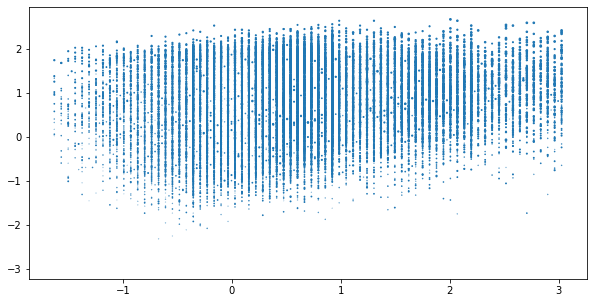

In [ ]:
plt.figure(figsize=(10, 5))
d_latihX = hasil[:,0]
d_latihY = hasil[:,1]
d_latihZ = hasil[:,2]
plt.scatter(d_latihX, d_latihY,d_latihZ,alpha=1)
plt.show() #menampilkan sebaran dataset awal

In [ ]:
data_scaled = pd.DataFrame((hasil),columns=['Penguapan','SuhuMin','SuhuMax'])
data_scaled

,Penguapan,SuhuMin,SuhuMax
0,-0.801151,-0.616194,-0.969068
1,1.048077,-0.883905,0.114178
2,-0.482318,-1.104373,-0.492440
3,-0.609851,0.234181,-0.275791
4,0.155346,-0.820914,-0.723532
...,...,...,...
58555,2.450939,0.612126,1.500732
58556,0.282879,0.423154,1.284083
58557,0.920544,0.218434,0.359714
58558,0.665478,1.131800,-0.001368


# **Clustering**

In [ ]:
# Rumus euclidian distance
# perhitungan jarak menggunakan euclidean distance dikarenakan rumus ini 
# sudah banyak digunakan dan paling cocok untuk menghitung jarak
def euclidian_distance(x,y,z,c1,c2,c3):
  return math.sqrt(((x-c1)**2) + ((y-c2)**2) + ((z-c3)**2))

In [ ]:
# Menampilkan centroid acak 
# fungsi ini akan melakukan generate titik centroid 3 dimensi secara acak sebanyak k
def random_centroid(k, df):
  centroid = {}
  for i in range(k):
    
    centroid[i] = [random.choices(df['Penguapan']),random.choices(df['SuhuMin']),random.choices(df['SuhuMax'])]

  # print(centroid)
  return centroid

In [ ]:
# Melakukan assignment pada masing masing objek 

def plot_cluster(centroid, df):
  color,jarak,distance = [],[],[]
  for i in centroid.keys():
    tmp = []
    for j in range(len(df['Penguapan'])):
      tmp.append(euclidian_distance(df['Penguapan'][j],df['SuhuMin'][j],df['SuhuMax'][j],centroid[i][0],centroid[i][1],centroid[i][2]))
    jarak.append(tmp)
 
  # Membuat column baru untuk menyimpan hasil cluster
  for i in range(len(jarak)):
    df['{}'.format(i)] = jarak[i]
    distance.append('{}'.format(i))
  
  # Mencari jarak terkecil antar cluster
  df['cluster'] = df.loc[:, distance].idxmin(axis=1)

  # Merubah tipe data cluster menjadi integer
  df.cluster = df.cluster.astype('int64')
  
  # Membuat kolom warna agar mudah saat melakukan visualisasi
  for i in df['cluster']:
    if(i == 1):
      color.append('y')
    elif(i==2):
      color.append('g')
    else:
      color.append('b')

  df['color'] = pd.DataFrame(color)
  
  return df

In [ ]:
# Melakukan update terhadap centroid

def update_centroid(centroid,df,k):
  for i in centroid.keys():
    
    # Menjumlahkan semua objek dalam centroid
    sum_x = sum(df[df['cluster'] == i]['Penguapan'])
    sum_y = sum(df[df['cluster'] == i]['SuhuMin'])
    sum_z = sum(df[df['cluster'] == i]['SuhuMax'])
      
    # Menghitung rataan centroid
    centroid[i][0] = sum_x/len(df[df['cluster'] == i])
    centroid[i][1] = sum_y/len(df[df['cluster'] == i])
    centroid[i][2] = sum_z/len(df[df['cluster'] == i])
  
  return centroid

In [ ]:
# Melakukan algoritma K-Means
def K_Means(df,k):
  
  centroid = random_centroid(k,df)
  df = plot_cluster(centroid, df)
  konvergen = False
  count = 0  

  while not konvergen:
    old_centroid = centroid
    centroid = update_centroid(centroid,df,k)
    df = plot_cluster(centroid, df)
    if old_centroid == centroid:
      count += 1
    else:
      count = 0

    if count == 20:
      konvergen = True

  # Plot 3D
  fig = plt.figure(figsize=(20, 15))
  ax = fig.add_subplot(111, projection='3d')
  
  ax.scatter(data_scaled['Penguapan'], data_scaled['SuhuMin'], data_scaled['SuhuMax'], c=data_scaled['color'], marker='o', cmap="RdBu")

  ax.set_xlabel('Penguapan')
  ax.set_ylabel('SuhuMin')
  ax.set_zlabel('SuhuMax')

  return df,centroid

[79962.71734028365, 59938.09312856612, 50301.76080164958, 42976.00734335633, 38707.623382097765, 35169.11878580812, 32212.205741874663, 30032.362127984583, 28022.211901808503]


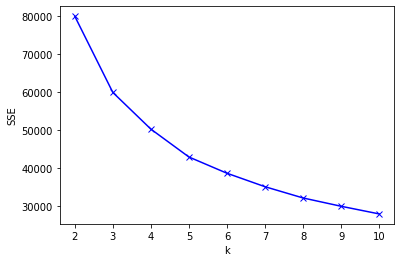

In [ ]:
from sklearn.cluster import KMeans
# Melakukan perhitungan elbowmethod
sse = []
K = range(2,11)
for k in K:
    km = KMeans(n_clusters=k)
  
    km = km.fit(data_scaled)
    
    sse.append(km.inertia_)

print(sse)
plt.plot(K, sse, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.show()

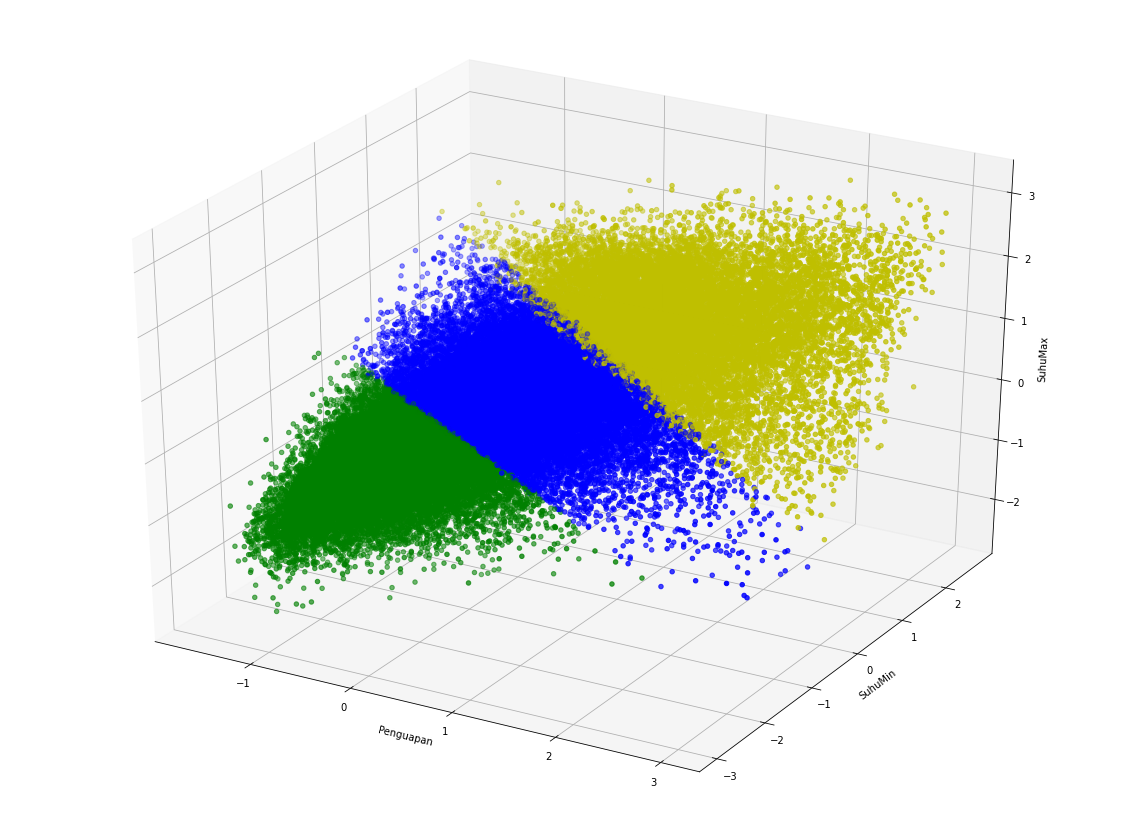

In [ ]:
# Algoritma kmeans yang dibuat mempunyai 2 buah return yaitu menyatakan data frame dan centroid
cluster = K_Means(data_scaled,3)
data_scaled = cluster[0]
centroid = cluster[1]

In [ ]:
x = data_scaled[['Penguapan','SuhuMin','SuhuMax']]
score = silhouette_score(x.to_numpy(),data_scaled['color'])
score

0.335362088290001